In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import pandas as pd
import numpy as np

# Example dataset (Study Hours, Attendance, Pass/Fail)
data = {
    'Study Hours': [2, 3, 4, 5, 1, 7, 8, 6, 3, 9, 10, 2, 4, 5, 8, 7, 9, 6, 3, 2],
    'Attendance': [60, 65, 70, 80, 50, 90, 95, 85, 60, 100, 98, 55, 72, 76, 88, 85, 92, 78, 66, 59],
    'Pass': [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Study Hours  Attendance  Pass
0            2          60     0
1            3          65     0
2            4          70     1
3            5          80     1
4            1          50     0



Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Dataset Description:
        Study Hours  Attendance      Pass
count    20.000000    20.00000  20.00000
mean      5.200000    76.20000   0.65000
std       2.726092    15.19903   0.48936
min       1.000000    50.00000   0.00000
25%       3.000000    63.75000   0.00000
50%       5.000000    77.00000   1.00000
75%       7.250000    88.50000   1.00000
max      10.000000   100.00000   1.00000


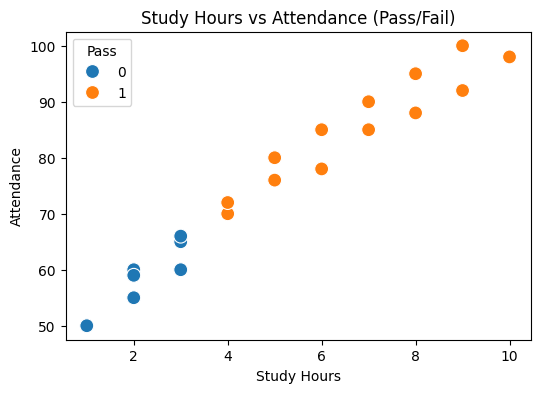

In [4]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nDataset Description:\n", df.describe())

# Visualize relationships
plt.figure(figsize=(6,4))
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=df, s=100)
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.show()

In [5]:
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", cm)


Accuracy: 1.00
Confusion Matrix:
 [[3 0]
 [0 3]]


In [8]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nFeature Importance:\n", coefficients)


Feature Importance:
        Feature  Coefficient
0  Study Hours     0.179237
1   Attendance     0.788586
